Matrix size 100x100 - Custom: 0.06809s, NumPy: 0.00038s
Matrix size 200x200 - Custom: 0.44113s, NumPy: 0.00325s
Matrix size 300x300 - Custom: 1.60650s, NumPy: 0.00971s
Matrix size 400x400 - Custom: 3.65129s, NumPy: 0.02493s
Matrix size 500x500 - Custom: 7.41394s, NumPy: 0.04477s
Matrix size 600x600 - Custom: 13.83761s, NumPy: 0.08182s
Matrix size 700x700 - Custom: 20.55928s, NumPy: 0.14246s
Matrix size 800x800 - Custom: 30.54942s, NumPy: 0.35989s
Matrix size 900x900 - Custom: 48.76718s, NumPy: 0.33964s
Matrix size 1000x1000 - Custom: 60.94886s, NumPy: 0.48604s


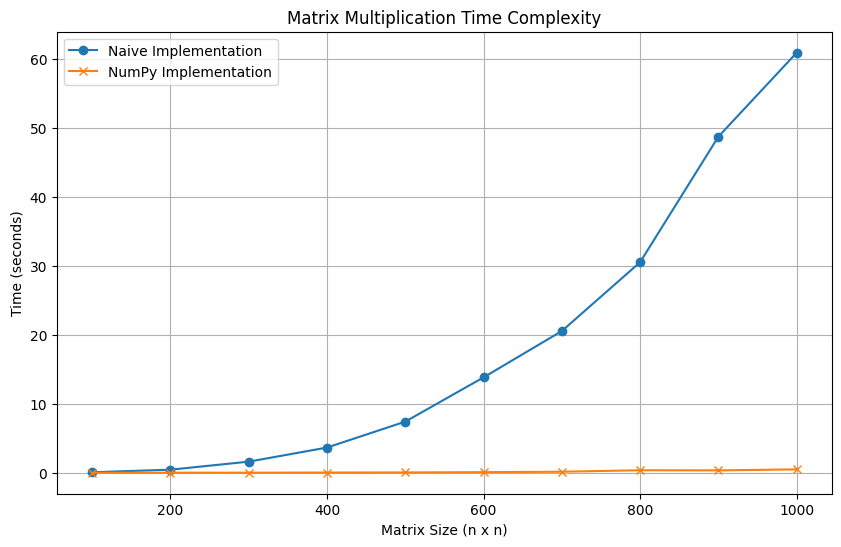

In [23]:
import time
import random
import numpy as np
import matplotlib.pyplot as plt

# Function to perform custom matrix multiplication Task 1 a)
def matrix_multiply(A, B):
    # Number of rows and columns
    n = len(A) 
    # Initialize the result matrix
    result = [[0] * n for _ in range(n)]
    
    # Perform matrix multiplication
    for i in range(n):
        for j in range(n):
            for k in range(n):
                result[i][j] += A[i][k] * B[k][j]
    return result

# Function to generate a square n x n matrix with random integers
def generate_matrix(n):
    return [[random.randint(1, 10) for _ in range(n)] for _ in range(n)]

# Benchmarking and comparison function task 1 b) and c)
def benchmark_comparison(step=100, max_size=1000):
    sizes = []
    custom_times = []
    numpy_times = []

    for n in range(step, max_size + 1, step):
        A = generate_matrix(n)
        B = generate_matrix(n)
        
        # Time custom matrix multiplication
        start_time = time.time()
        matrix_multiply(A, B)
        custom_time = time.time() - start_time
        
        # Convert A and B to numpy arrays
        A_np = np.array(A)
        B_np = np.array(B)

        # Time NumPy matrix multiplication
        start_time = time.time()
        np.matmul(A_np, B_np)
        numpy_time = time.time() - start_time

        # Store the results
        sizes.append(n)
        custom_times.append(custom_time)
        numpy_times.append(numpy_time)

        print(f"Matrix size {n}x{n} - Custom: {custom_time:.5f}s, NumPy: {numpy_time:.5f}s")
    
    # Plot the benchamrk results
    plt.figure(figsize=(10, 6))
    plt.plot(sizes, custom_times, label='Naive Implementation', marker='o')
    plt.plot(sizes, numpy_times, label='NumPy Implementation', marker='x')
    plt.xlabel('Matrix Size (n x n)')
    plt.ylabel('Time (seconds)')
    plt.title('Matrix Multiplication Time Complexity')
    plt.legend()
    plt.grid(True)
    plt.show()

# Running the benchmark
benchmark_comparison()




Task 1 d) Time complexity of custom implementation is O(n^3). This is because we have three nested loops and in each for-loop it performs n multiplications and additions. So its n x n x n = O(n^3)


Time complexity of NumPy implementation is also O(n^3) but there are some differences. NumPy relies on optimized Low-Level-Librarys, which are written for example in C. They use optimizations which increase the efficency. This increases the speed of the multiplication immensely. This is the reason why NumPy is so much faster, because of this optimized operations, which use memory and processors more efficiently than the Python interpreter.

In [38]:
import numpy as np
import time
import random

# Naive Matrix Multiplication (O(n^3))
# This function multiplies two matrices A and B using the traditional approach.
def naive_multiplication(A, B):
    n = len(A)  # Get the size of the square matrices
    result = [[0] * n for _ in range(n)]  # Initialize the result matrix with zeros
    
    # Iterate through each element of the result matrix
    for i in range(n):
        for j in range(n):
            for k in range(n):
                # The element at result[i][j] is the sum of products of corresponding elements from row i of A and column j of B
                result[i][j] += A[i][k] * B[k][j]
    
    return result  # Return the resulting matrix

# Recursive Strassen's Algorithm
# This function multiplies two matrices A and B recursively using the Strassen algorithm.
def Strassen(A, B):
    # Base case: When matrices are reduced to 1x1, simply return the product
    if len(A) == 1 and len(B) == 1:
        return [[A[0][0] * B[0][0]]]
    
    # Extract the elements from the matrices A and B
    a, b, c, d = A[0][0], A[0][1], A[1][0], A[1][1]  # Elements of matrix A
    e, f, g, h = B[0][0], B[0][1], B[1][0], B[1][1]  # Elements of matrix B
    
    # Compute the 7 intermediate products (S1 to S7) using recursive calls to Strassen on submatrices
    S1 = Strassen([[b - d]], [[g + h]])[0][0]  # S1 = (b-d) * (g+h), extracted from the result of Strassen
    S2 = Strassen([[a + d]], [[e + h]])[0][0]  # S2 = (a+d) * (e+h)
    S3 = Strassen([[a - c]], [[e + f]])[0][0]  # S3 = (a-c) * (e+f)
    S4 = Strassen([[a + b]], [[h]])[0][0]      # S4 = (a+b) * h
    S5 = Strassen([[a]], [[f - h]])[0][0]      # S5 = a * (f-h)
    S6 = Strassen([[d]], [[g - e]])[0][0]      # S6 = d * (g-e)
    S7 = Strassen([[c + d]], [[e]])[0][0]      # S7 = (c+d) * e
    
    # Combine the esults to form the final matrix product (C11, C12, C21, C22)
    C11 = S1 + S2 - S4 + S6  # First quadrant of the result
    C12 = S4 - S5            # Second quadrant of the result
    C21 = S6 + S7            # Third quadrant of the result
    C22 = S2 - S3 + S5 - S7  # Fourth quadrant of the result
    
    # Return the resulting matrix as a 2x2 matrix
    return [[C11, C12],
            [C21, C22]]

# Non-Recursive Strassen's Algorithm
# This function multiplies two matrices A and B using a non-recursive version of Strassen's algorithm.
def strassen_non_recursive(A, B):
    # Extract elements of A and B (2x2 matrices assumed)
    a, b, c, d = A[0][0], A[0][1], A[1][0], A[1][1]
    e, f, g, h = B[0][0], B[0][1], B[1][0], B[1][1]
    
    # Compute the 7 products
    S1 = (b - d) * (g + h)  
    S2 = (a + d) * (e + h)  
    S3 = (a - c) * (e + f)  
    S4 = (a + b) * h        
    S5 = a * (f - h)        
    S6 = d * (g - e)        
    S7 = (c + d) * e        
    
    # Combine the results to form the final matrix product
    C11 = S1 + S2 - S4 + S6  # First quadrant of the result
    C12 = S4 - S6            # Second quadrant of the result
    C21 = S6 + S7            # Third quadrant of the result
    C22 = S2 - S3 + S5 - S7  # Fourth quadrant of the result
    
    # Return the resulting matrix as a 2x2 matrix
    return [[C11, C12],
            [C21, C22]]

# NumPy Matrix Multiplication
# This function multiplies two matrices A and B using NumPy's optimized dot product function.
def numpy_multiplication(A, B):
    return np.dot(A, B)


# This function measures the time
def measure_time(func, A, B):
    start_time = time.time()  # Record the start time
    func(A, B)  # Call the matrix multiplication function
    return time.time() - start_time  # Return the time taken in seconds


# This function performs the matrix multiplication using the different methods and compares the performance.
def performance_comparison():
    # Generate random 2x2 matrices A and B with values between -1000 and 1000
    A = [
        [random.randint(-1000, 1000), random.randint(-1000, 1000)],
        [random.randint(-1000, 1000), random.randint(-1000, 1000)]
    ]
    B = [
        [random.randint(-1000, 1000), random.randint(-1000, 1000)],
        [random.randint(-1000, 1000), random.randint(-1000, 1000)]
    ]
    
    # Print the generated matrices A and B for reference
    print("Matrix A:", A)
    print("Matrix B:", B)
    #empty line 
    print()
    
    # Measure and print the time for each matrix multiplication method
    print(f"Naive implementation: {measure_time(naive_multiplication, A, B):.10f} seconds")
    print(f"Strassen recursive: {measure_time(Strassen, A, B):.10f} seconds")
    print(f"Strassen non recursive: {measure_time(strassen_non_recursive, A, B):.10f} seconds")
    print(f"Numpy: {measure_time(numpy_multiplication, np.array(A), np.array(B)):.10f} seconds")

performance_comparison()


Matrix A: [[-245, 735], [-237, -267]]
Matrix B: [[-996, -270], [890, -537]]

Naive implementation: 0.0000078678 seconds
Strassen recursive: 0.0000090599 seconds
Strassen non recursive: 0.0000021458 seconds
Numpy: 0.0000109673 seconds
